# Exercise 1. Apriori

Trace the results of using the Apriori algorithm on the grocery store example with support threshold s=33.34% and confidence threshold c=60%. Show the candidate and frequent itemsets for each database scan. Enumerate all the final frequent itemsets. Also indicate the association rules that are generated and
highlight the strong ones, sort them by confidence.
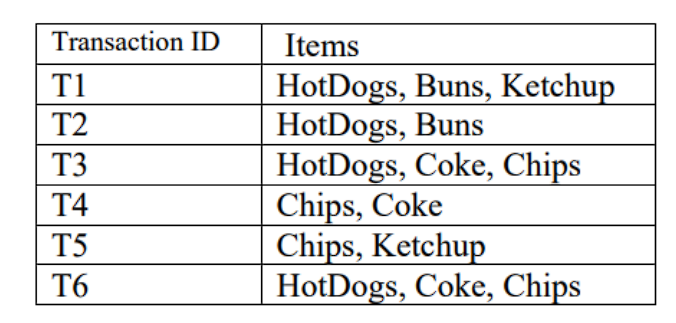

In [42]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load your transaction data
data = [
    {"Transaction ID": "T1", "Items": "HotDogs, Buns, Ketchup"},
    {"Transaction ID": "T2", "Items": "HotDogs, Buns"},
    {"Transaction ID": "T3", "Items": "HotDogs, Coke, Chips"},
    {"Transaction ID": "T4", "Items": "Chips, Coke"},
    {"Transaction ID": "T5", "Items": "Chips, Ketchup"},
    {"Transaction ID": "T6", "Items": "HotDogs, Coke, Chips"},
]

df = pd.DataFrame(data)
print(f"\nData:\n{df}")

# Data Preprocessing
transactions = df["Items"].str.split(", ")

# Create a one-hot encoded DataFrame
oht = transactions.str.join("|").str.get_dummies()

# Set the support and confidence thresholds
MIN_SUPPORT = 0.3334
MIN_CONFIDENCE = 0.60

# Run Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(oht, min_support=MIN_SUPPORT, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=MIN_CONFIDENCE)

# Sort the rules by confidence
rules = rules.sort_values(by="confidence", ascending=False)

# Display results
print(f"\nFrequent Itemsets with min support {MIN_SUPPORT}:\n")
print(frequent_itemsets)

print(f"\nAssociation Rules (sorted by confidence), min confidence = {MIN_CONFIDENCE}:\n")
print(rules)


Data:
  Transaction ID                   Items
0             T1  HotDogs, Buns, Ketchup
1             T2           HotDogs, Buns
2             T3    HotDogs, Coke, Chips
3             T4             Chips, Coke
4             T5          Chips, Ketchup
5             T6    HotDogs, Coke, Chips

Frequent Itemsets with min support 0.3334:

    support       itemsets
0  0.666667        (Chips)
1  0.500000         (Coke)
2  0.666667      (HotDogs)
3  0.500000  (Coke, Chips)

Association Rules (sorted by confidence), min confidence = 0.6:

  antecedents consequents  antecedent support  consequent support  support  \
0      (Coke)     (Chips)            0.500000            0.666667      0.5   
1     (Chips)      (Coke)            0.666667            0.500000      0.5   

   confidence  lift  leverage  conviction  zhangs_metric  
0        1.00   1.5  0.166667         inf       0.666667  
1        0.75   1.5  0.166667         2.0       1.000000  


/home/thinhlpg/anaconda3/envs/dbm301/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


### Frequent Itemsets with min support 0.3334:

- The frequent itemsets are combinations of items that appear frequently in the transactions.
- "Chips," "HotDogs," "Coke," and the combination of "Coke" and "Chips" are frequent itemsets.
- The support value shows the percentage of transactions containing each itemset.
"Chips" appears in 66.67% of the transactions.
"HotDogs" appears in 66.67% of the transactions.
"Coke" appears in 50% of the transactions.
The combination of "Coke" and "Chips" appears in 50% of the transactions.

### Association Rules:

In this case, we only have one association rule.
The rule: "If a transaction contains 'Coke,' it's highly confident (confidence = 1.00) that it also contains 'Chips.'"
This rule has a lift of 1.5, suggesting a positive correlation between "Coke" and "Chips."
The leverage and conviction values also provide insights into the rule's strength.

### Summary
In summary, based on the provided data, it's highly likely that when customers purchase "Coke," they will also purchase "Chips," and this association is strong and positively correlated.

# Exercise 2. FP-tree and FP-Growth
a) Use the transactional database from the previous exercise with same support threshold and build a
frequent pattern tree (FP-Tree). Show for each transaction how the tree evolves.

b) Use Fp-Growth to discover the frequent itemsets from this FP-tree.

# Exercise 3: 
- Use a dataset described nominal attributes, e.g. weather.nominal. Run the Apriori algorithm to generate association rules

- weather.nominal.csv is placed in ./data/weather.nominal.csv

In [28]:
import pandas as pd

# Load the data from the CSV file
df_original = pd.read_csv("./data/weather.nominal.csv")
print(df_original)

     outlook temperature humidity  windy play
0      sunny         hot     high  False   no
1      sunny         hot     high   True   no
2   overcast         hot     high  False  yes
3      rainy        mild     high  False  yes
4      rainy        cool   normal  False  yes
5      rainy        cool   normal   True   no
6   overcast        cool   normal   True  yes
7      sunny        mild     high  False   no
8      sunny        cool   normal  False  yes
9      rainy        mild   normal  False  yes
10     sunny        mild   normal   True  yes
11  overcast        mild     high   True  yes
12  overcast         hot   normal  False  yes
13     rainy        mild     high   True   no


In [29]:
# Create a list of transactions (lists of items) for easier analysis
transactions = []
for i in range(len(df_original)):
    transaction = []
    for column in df_original.columns:
        transaction.append(f"{column}={df_original.at[i, column]}")
    transactions.append(transaction)

# Convert the list of transactions to a DataFrame
df = pd.DataFrame(transactions, columns=df.columns)

# Display the DataFrame
print("Better dataframe")
print(df)


print("\nOne-hot encoded\n")
transactions = []
for i in range(df.shape[0]):
    transaction = [str(df.values[i, j]) for j in range(df.shape[1])]
    transactions.append(transaction)

# Convert the list of transactions into a DataFrame
df = pd.DataFrame(transactions, columns=df.columns)

# One-hot encode the data
df_encoded = pd.get_dummies(df, prefix="", prefix_sep="")

print(df_encoded)

Better dataframe
             outlook       temperature         humidity        windy      play
0      outlook=sunny   temperature=hot    humidity=high  windy=False   play=no
1      outlook=sunny   temperature=hot    humidity=high   windy=True   play=no
2   outlook=overcast   temperature=hot    humidity=high  windy=False  play=yes
3      outlook=rainy  temperature=mild    humidity=high  windy=False  play=yes
4      outlook=rainy  temperature=cool  humidity=normal  windy=False  play=yes
5      outlook=rainy  temperature=cool  humidity=normal   windy=True   play=no
6   outlook=overcast  temperature=cool  humidity=normal   windy=True  play=yes
7      outlook=sunny  temperature=mild    humidity=high  windy=False   play=no
8      outlook=sunny  temperature=cool  humidity=normal  windy=False  play=yes
9      outlook=rainy  temperature=mild  humidity=normal  windy=False  play=yes
10     outlook=sunny  temperature=mild  humidity=normal   windy=True  play=yes
11  outlook=overcast  temperature=m

In [34]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


MIN_SUPPORT = 0.3
MIN_CONFIDENCE = 0.5

# Find frequent itemsets with a minimum support of 0.5
frequent_itemsets = apriori(df_encoded, min_support=MIN_SUPPORT, use_colnames=True)

# Generate association rules with a minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=MIN_CONFIDENCE)

# Print the frequent itemsets
print(f"Frequent Itemsets with min support {MIN_SUPPORT}:\n")
print(frequent_itemsets)

# Print the association rules
print(f"\nAssociation Rules with min confidence {MIN_CONFIDENCE}:\n")
print(rules)

Frequent Itemsets with min support 0.3:

     support                     itemsets
0   0.357143              (outlook=rainy)
1   0.357143              (outlook=sunny)
2   0.428571           (temperature=mild)
3   0.500000              (humidity=high)
4   0.500000            (humidity=normal)
5   0.571429                (windy=False)
6   0.428571                 (windy=True)
7   0.357143                    (play=no)
8   0.642857                   (play=yes)
9   0.428571  (play=yes, humidity=normal)
10  0.428571      (play=yes, windy=False)

Association Rules with min confidence 0.5:

         antecedents        consequents  antecedent support  \
0         (play=yes)  (humidity=normal)            0.642857   
1  (humidity=normal)         (play=yes)            0.500000   
2         (play=yes)      (windy=False)            0.642857   
3      (windy=False)         (play=yes)            0.571429   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.


###
### Association rules:
- play=yes => humidity=normal:
Confidence: 66.67%
Interpretation: If a transaction contains "play=yes," there's a 66.67% chance it also contains "humidity=normal."
Lift: 1.3333 (positive correlation).

- humidity=normal => play=yes:
Confidence: 85.71%
Interpretation: If a transaction contains "humidity=normal," there's an 85.71% chance it also contains "play=yes."
Lift: 1.3333 (positive correlation).

- play=yes => windy=False:
Confidence: 66.67%
Interpretation: If a transaction contains "play=yes," there's a 66.67% chance it also contains "windy=False."
Lift: 1.1667 (slight positive correlation).

- windy=False => play=yes:
Confidence: 75%
Interpretation: If a transaction contains "windy=False," there's a 75% chance it also contains "play=yes."
Lift: 1.1667 (positive correlation).